In [1]:
import sympy as sp
import numpy as np
sp.init_printing(use_unicode=True)

In [2]:
def T(a, α, d, θ):
    return sp.Matrix([[sp.cos(θ),-sp.sin(θ),0,a],
                      [sp.sin(θ)*sp.cos(α),sp.cos(θ)*sp.cos(α),-sp.sin(α),-sp.sin(α)*d],
                      [sp.sin(θ)*sp.sin(α),sp.cos(θ)*sp.sin(α),sp.cos(α), sp.cos(α)*d],
                      [0,0,0,1]])
def R(a, α, d, θ):
    return T(a, α, d, θ)[:3,:3]
def P(a, α, d, θ):
    return T(a, α, d, θ)[:3,-1]

In [3]:
N_deg = 6
θ = sp.symbols('θ1:%d'%(N_deg+1))
α = sp.symbols('α1:%d'%(N_deg+1))
a = sp.symbols('a1:%d'%(N_deg+1))
d = sp.symbols('d1:%d'%(N_deg+1))

In [4]:
Rm = []
for i in range(3):
    Rm.append(R(0, 0, 0, θ[i]))
    
Rm[2] = Rm[2].subs(θ[2],0)

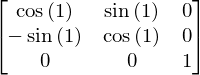

In [5]:
iRm = [sp.trigsimp(r.inv()) for r in Rm]
iRm[0]

In [6]:
def zerov(last=0):
    return sp.Matrix([[0],[0],[last]]) 
ω = [zerov(),zerov(),zerov(),zerov()]
v = [zerov(),zerov(),zerov(),zerov()]

θs = sp.symbols('θs1:%d'%(N_deg+1))

In [7]:
p = [zerov(),sp.Matrix([[sp.symbols('L1')],[0],[0]]),sp.Matrix([[sp.symbols('L2')],[0],[0]])]

In [8]:
for i in range(3):
    ω[i+1] = iRm[i]*ω[i] + zerov(θs[i])
    v[i+1] = iRm[i]*(v[i] + ω[i].cross(p[i]))

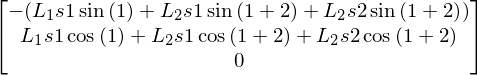

In [13]:
sp.trigsimp(Rm[0]*Rm[1]*Rm[2]*v[3])

In [41]:
AA = sp.trigsimp(T(a[0], α[0], d[0], θ[0])*T(a[1], α[1], d[1], θ[1]))

In [37]:
a2 = 340
a3 = 25
d3 = 90
d4 = 260
def rad(a):
    return np.pi/180*a
θ_num = [rad(45),rad(60),rad(75),0,0]
α_num = [0,-np.pi/2,0,-np.pi/2,np.pi/2,-np.pi/2]
a_num = [0,0,a2,a3,0,0]
d_num = [0,0,d3,d4,0,0]

In [38]:
Tf = T(0,0,0,0)
for it in zip(a_num,α_num,d_num,θ_num):
    Tf = Tf*T(*it)

In [39]:
Tf

Matrix([
[              -0.5,              -0.5,   -0.707106781186547, -85.9314575050762],
[              -0.5,              -0.5,    0.707106781186548,  41.3477631085024],
[-0.707106781186548, 0.707106781186547, 6.12323399573677e-17,  -128.27854370787],
[                 0,                 0,                    0,                 1]])

In [1]:
a = [[7587, 321, 112, 950], [6695, 211, 345, 820], [3788, 308, 450, 750], [8108, 278, 88, 999], [5652, 223, 212, 812], 
     [677, 355, 90, 901], [5812, 401, 185, 788], [7432,208,208,790]]


In [12]:
import numpy as np
z = np.zeros((len(a),len(a)))
for i,x in enumerate(a):
    for j,y in enumerate(a):
        z[i][j] = x[0]>y[0] and x[1]<y[1] and x[2] > y[2] and x[3] > y[3]
        if (z[i][j]):
            print("%d dominates %d" % (i,j))

0 dominates 5
1 dominates 4
1 dominates 6
7 dominates 6


In [11]:
z

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])